# Example notebook using the Joint Return Probability (JRP) module

In [8]:
from app import jrp 

In [10]:
oslo = jrp.JRP(
file_data ="example_data.csv",
file_thresholds="example_thresholds.csv"
)

Loading event data ...


In [11]:
oslo.get_stan_data()

Preprocessing data for Stan ...


In [13]:
oslo.build_stan_model(file_model="app/model.stan")

Building Stan model ...
Building: 0.6s
Building: 0.7s
Building: 0.9s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.2s
Building: 7.3s
Building: 7.4s
B

In file included from /home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/httpstan/include/stan/model/indexing.hpp:5:0,
                 from /home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:17,
                 from /home/talfan/.cache/httpstan/4.8.2/models/p5njn5op/model_p5njn5op.cpp:2:
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp: In function ‘void stan::model::assign(Mat1&&, const Mat2&, const char*, const stan::model::index_multi&, const stan::model::index_multi&)’:
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp:401:46: warning: typedef ‘using pair_type = struct std::pair<int, std::vector<int, stan::math::arena_allocator<int> > >’ locally defined but not used [-Wunused-local-typedefs]
   using pair_type = std::pair<int, arena_vec>;
                           

Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s


/home/talfan/.cache/httpstan/4.8.2/models/p5njn5op/model_p5njn5op.cpp: In instantiation of ‘void model_p5njn5op_namespace::model_p5njn5op::transform_inits_impl(VecVar&, VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/talfan/.cache/httpstan/4.8.2/models/p5njn5op/model_p5njn5op.cpp:2727:69:   required from here
/home/talfan/.cache/httpstan/4.8.2/models/p5njn5op/model_p5njn5op.cpp:2249:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
       int pos__ = std::numeric_limits<int>::min();
           ^~~~~


Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.6s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.2s
Building: 19.3s
Building: 19.4s
Building: 19.5s
Building: 19.6s
Building: 19.7s
Building: 19.8s
Building: 19.9s
Building: 20.0s
Building: 20.1s
Building: 20.2s
Building: 20.3s
Building: 20.4s
Building: 20.5s
Building: 20.6s
Building: 20.7s
Building: 20.8s
Building: 20.9s
Building: 21.0s
Building: 21.1s
Building: 21.2s
Building: 21.3s
Building: 21.4s
Building: 21.5s
Building: 21.6s
Building: 21.8s
Building: 21.9s
Building: 22.0s
Building

Building: 41.5s
Building: 41.6s
Building: 41.7s
Building: 41.8s
Building: 41.9s
Building: 42.0s
Building: 42.1s
Building: 42.2s
Building: 42.3s
Building: 42.4s
Building: 42.5s
Building: 42.6s
Building: 42.7s
Building: 42.8s
Building: 42.9s
Building: 43.0s
Building: 43.1s
Building: 43.2s
Building: 43.3s
Building: 43.4s
Building: 43.5s
Building: 43.6s
Building: 43.8s
Building: 43.9s
Building: 44.0s
Building: 44.1s
Building: 44.2s
Building: 44.3s
Building: 44.4s
Building: 44.5s
Building: 44.6s
Building: 44.7s
Building: 44.8s
Building: 44.9s
Building: 45.0s
Building: 45.1s
Building: 45.2s
Building: 45.3s
Building: 45.4s
Building: 45.5s
Building: 45.6s


Building: 45.6s, done.
Messages from stanc:
Warning in '/tmp/httpstan_0k19gerb/model_p5njn5op.stan', line 151, column 14: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_0k19gerb/model_p5njn5op.stan', line 152, column 14: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_0k19gerb/model_p5njn5op.stan', line 309, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning 

In [14]:
oslo.run_stan_model()

Sampling:   0%


Running Stan model ...


Sampling:   0% (1/12000)
Sampling:   0% (2/12000)
Sampling:   0% (3/12000)
Sampling:   0% (4/12000)
Sampling:   1% (103/12000)
Sampling:   2% (202/12000)
Sampling:   3% (301/12000)
Sampling:   3% (400/12000)
Sampling:   4% (500/12000)
Sampling:   5% (600/12000)
Sampling:   6% (700/12000)
Sampling:   7% (800/12000)
Sampling:   8% (900/12000)
Sampling:   8% (1000/12000)
Sampling:   9% (1100/12000)
Sampling:  10% (1200/12000)
Sampling:  11% (1300/12000)
Sampling:  12% (1400/12000)
Sampling:  12% (1500/12000)
Sampling:  13% (1600/12000)
Sampling:  14% (1700/12000)
Sampling:  15% (1800/12000)
Sampling:  16% (1900/12000)
Sampling:  17% (2000/12000)
Sampling:  18% (2100/12000)
Sampling:  18% (2200/12000)
Sampling:  19% (2300/12000)
Sampling:  20% (2400/12000)
Sampling:  21% (2500/12000)
Sampling:  22% (2600/12000)
Sampling:  22% (2700/12000)
Sampling:  23% (2800/12000)
Sampling:  24% (2900/12000)
Sampling:  25% (3000/12000)
Sampling:  26% (3100/12000)
Sampling:  27% (3200/12000)
Sampling:  28

  Exception: Exception: Exception: k<0 and max(y-ymin)/sigma > -1/k; found k, sigma =-6.59431e+758.83637e+75 (in '/tmp/httpstan_7tqo85zw/model_p5njn5op.stan', line 17, column 10 to column 81) (in '/tmp/httpstan_7tqo85zw/model_p5njn5op.stan', line 256, column 8 to column 49) (in '/tmp/httpstan_7tqo85zw/model_p5njn5op.stan', line 345, column 8 to line 348, column 34)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.00093 seconds
  1000 transitions using 10 leapfrog steps per transition would take 9.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: Exception: Exception: sigma<=0; found sigma =0 (in '/tmp/httpstan_7tqo85zw/model_p5njn5op.stan', 

Generating trace plot ...


/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/plots/traceplot.py:212: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (33), generating only 20 plots
  warnings.warn(
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


()

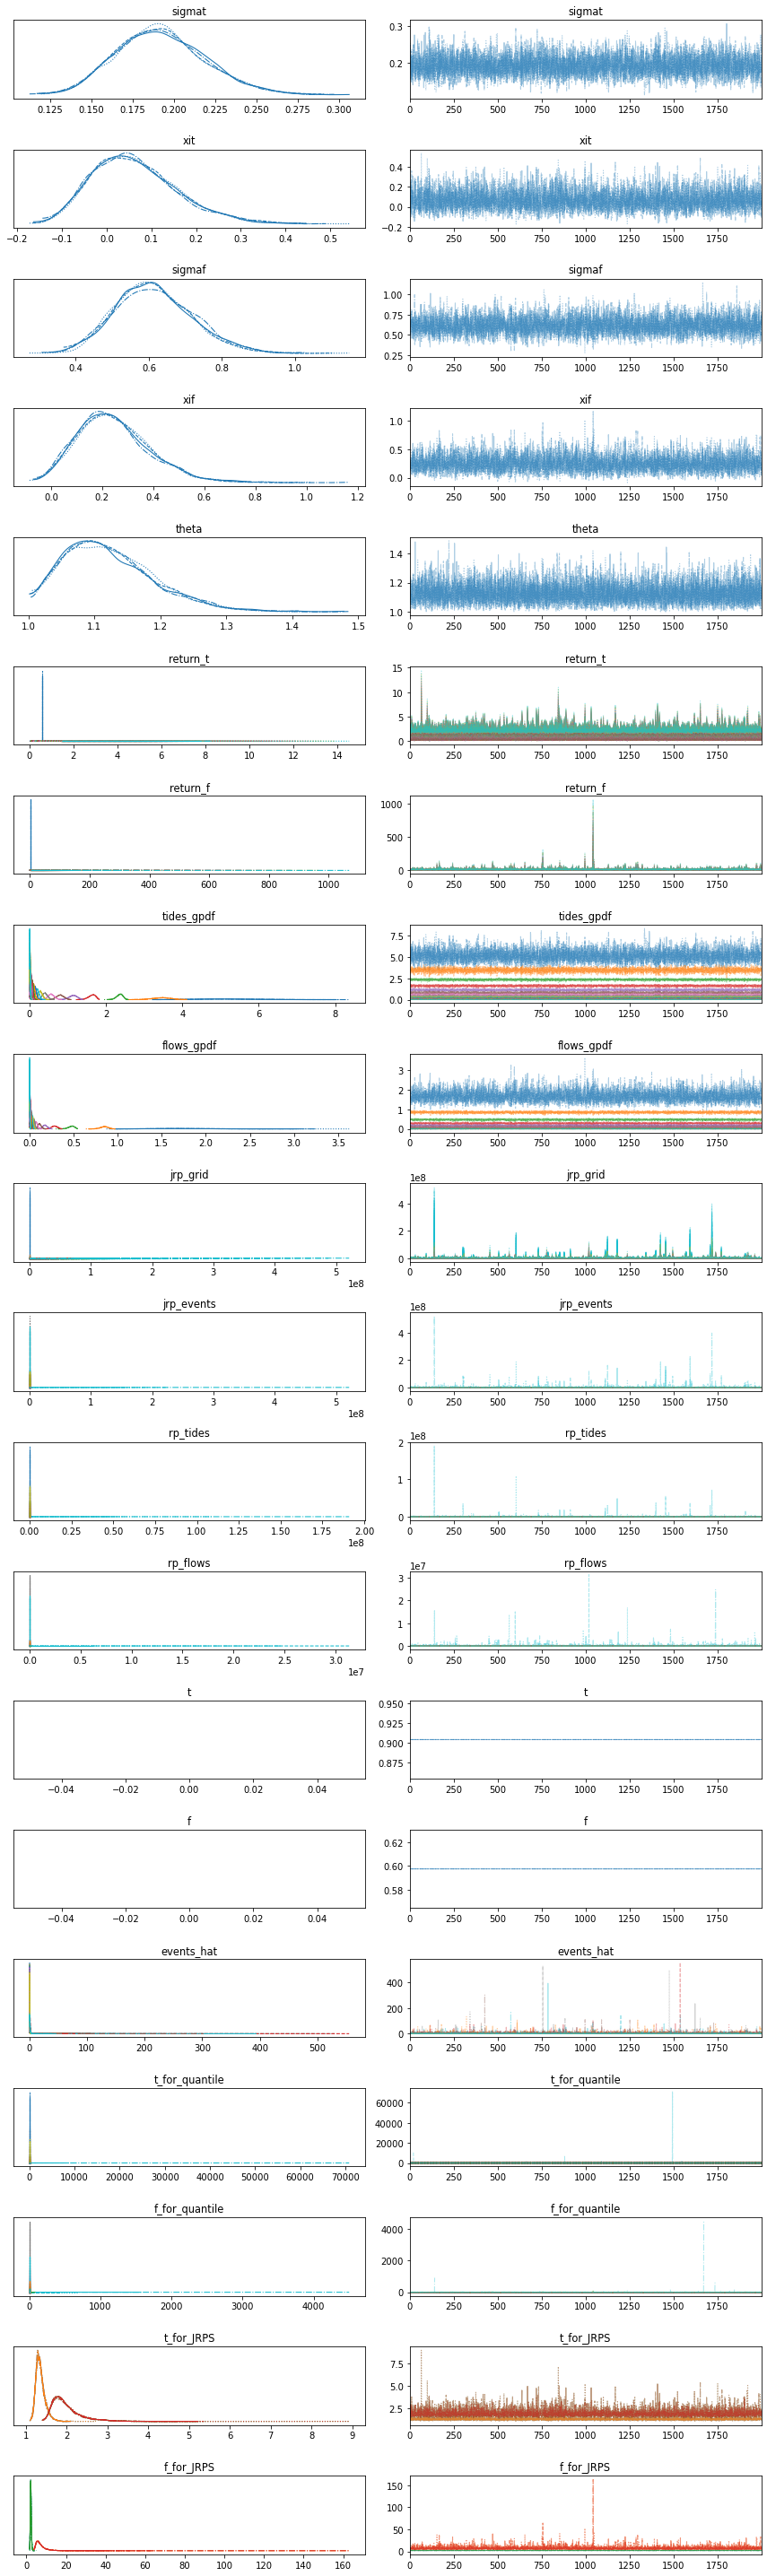

In [18]:
oslo.generate_trace_plot(filename='DATA/trace_plot1.png')

Generating corner plot ...


/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/plots/pairplot.py:242: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


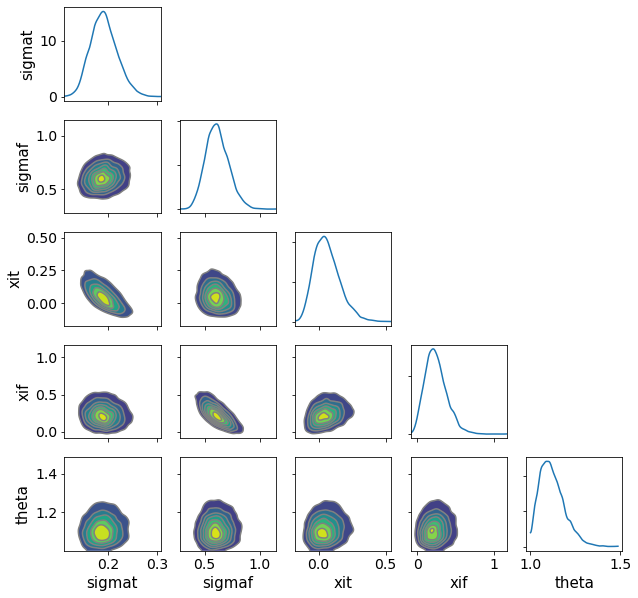

In [19]:
oslo.generate_corner_plot(filename='DATA/corner_plot1.png')

In [ ]:
oslo.generate_jrp_plot(filename='DATA/jrp_plot.png')

In [20]:
oslo.summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigmat,0.192,0.027,0.145,0.244,0.000,0.000,5819.0,5262.0,1.0
xit,0.063,0.096,-0.099,0.250,0.001,0.001,4965.0,4719.0,1.0
sigmaf,0.614,0.104,0.420,0.809,0.001,0.001,5407.0,5406.0,1.0
xif,0.245,0.142,0.006,0.514,0.002,0.001,4732.0,4552.0,1.0
theta,1.123,0.069,1.012,1.249,0.001,0.001,6871.0,4154.0,1.0
...,...,...,...,...,...,...,...,...,...
u2[0],0.499,0.288,0.018,0.955,0.003,0.002,8216.0,7575.0,1.0
t_hat,0.787,0.223,0.582,1.173,0.002,0.002,7784.0,6974.0,1.0
f_hat,1.271,1.426,0.450,2.852,0.016,0.012,8202.0,7463.0,1.0
v1,0.498,0.287,0.026,0.964,0.003,0.002,8032.0,7771.0,1.0
